In [1]:
#Importing the Necessary Library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, auc


# Telecom Customer Churn Prediction.

objective :- 

To predict whether a customer will churn using different classification algorithms.
Identifying key features or parameters which lead towards churning of customer.
Building various ML models to predict whether a customer will churn, evaluate the accuracy
and performance of these models.

In [2]:
df = pd.read_csv('C:/Users/hp/Downloads/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["Churn"].value_counts() 


No     5174
Yes    1869
Name: Churn, dtype: int64

# The dataset is imbalanced and we need to apply the class imbalance handling techniques.


In [ ]:
#data Preprocessing


In [8]:
df_1 = df.copy(deep =True)

In [9]:
df_1.TotalCharges = pd.to_numeric(df_1.TotalCharges, errors='coerce')
df_1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df_1.loc[df_1["TotalCharges"].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The Null values are very less as compared to the entire dataset so we can drop them.

In [14]:
#Removing missing values 
df_1.dropna(how = 'any', inplace = True)

In [15]:
df_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Now, we divide the customers into bins based on tenure , for example: for a tenure < 12 months: assign a tenure group  1 for if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24, and so on.

In [16]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_1['tenure_group'] = pd.cut(df_1.tenure, range(1, 80, 12), right=False, labels=labels)

In [17]:
df_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


In [19]:
#drop column customerID and tenure
df_1.drop(columns= ['customerID','tenure'], axis = 1, inplace=True)
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [24]:
df_1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 n

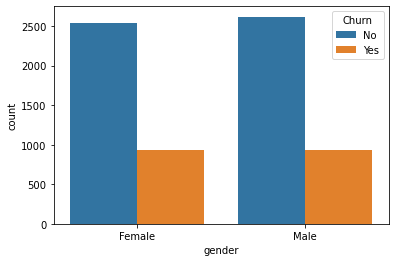

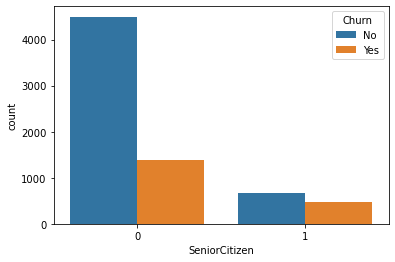

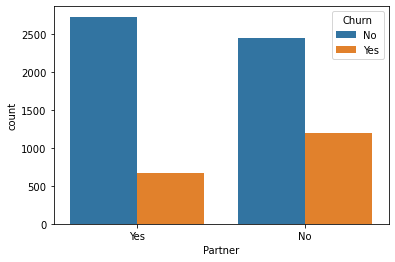

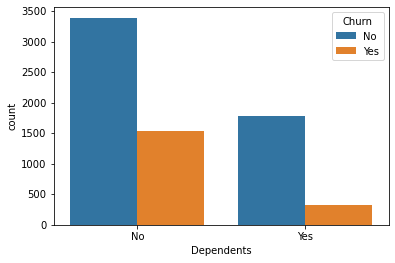

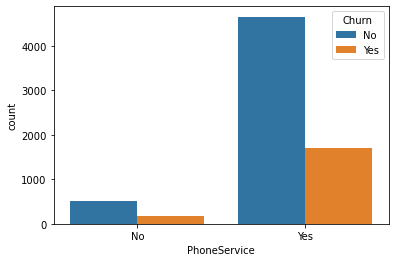

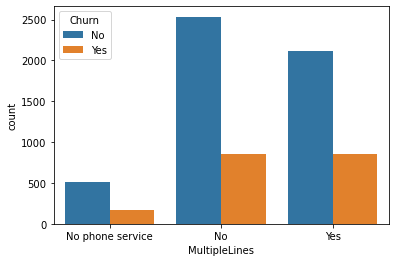

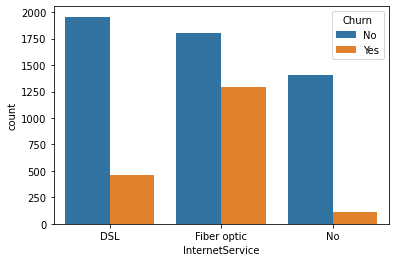

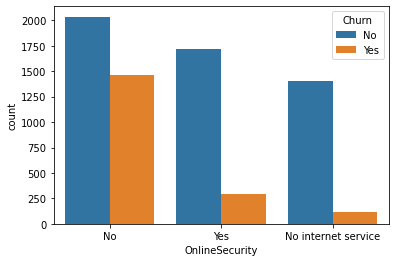

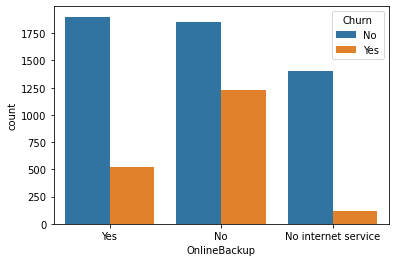

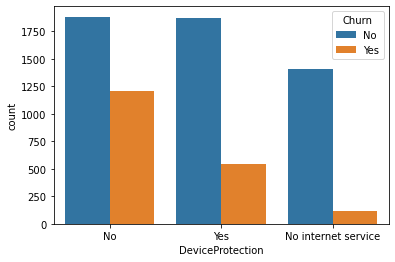

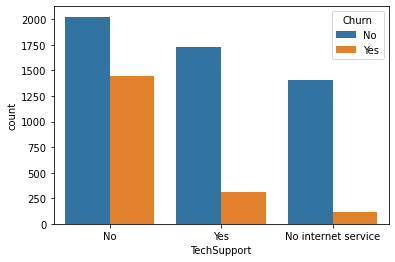

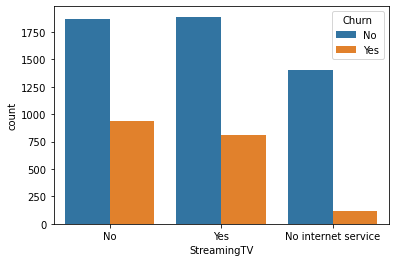

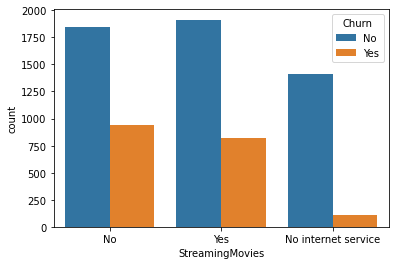

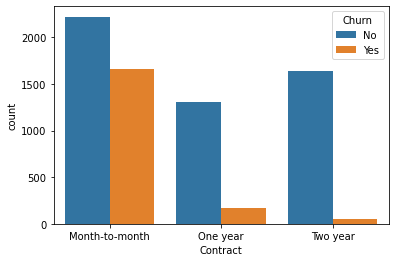

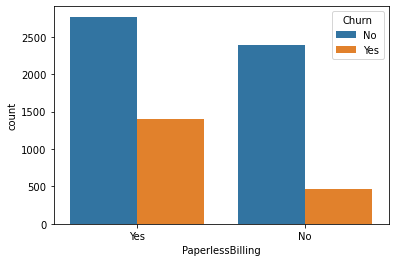

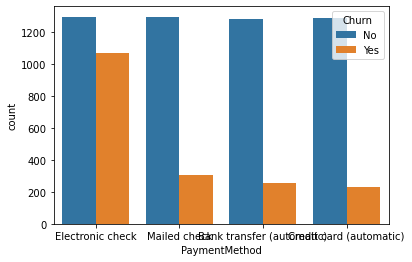

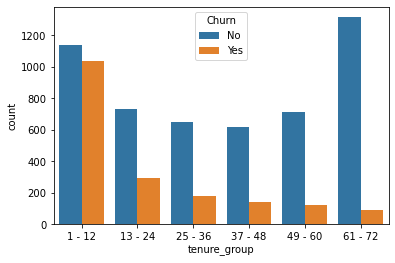

In [32]:
for i, predictor in enumerate(df_1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_1, x=predictor, hue='Churn')
          

# Conclusions derived from EDA:
1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners 

# Observations:

(a) Churn is high when Monthly Charges are high.

(b) HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

(c)LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years.

(d)Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

In [33]:
df_1['Churn'] = np.where(df_1.Churn == 'Yes',1,0) #target variable conversion

In [34]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [35]:
df_1_dummies = pd.get_dummies(df_1) #we have not dropped the one columns of the categorical Feautures.
df_1_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


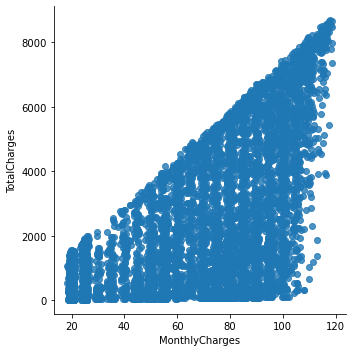

In [36]:
sns.lmplot(data=df_1_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Observation - Total Charges increase as Monthly Charges increase(which is expected).

Text(0.5, 1.0, 'Monthly charges by churn')

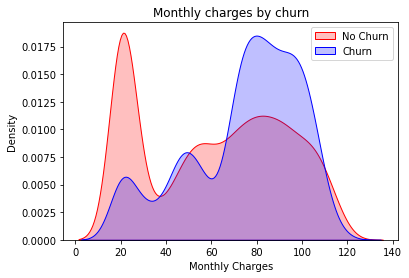

In [37]:
Mth = sns.kdeplot(df_1_dummies.MonthlyCharges[(df_1_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_1_dummies.MonthlyCharges[(df_1_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

As expected churn is high when the Monthly charges are high

As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. This is called a stratified train-test split.

In [505]:
#First splitting the data and then applying smote on the training data only.

In [506]:
#splitting the data 

df_model = df_1_dummies

X = df_model.drop('Churn', axis = 1)
Y = df_model['Churn']

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3 , stratify = Y) #stratified sampling same proportion of data in train and test sets.

In [507]:
scale_cols = ['MonthlyCharges','TotalCharges']

# now we will scale all the data: 
scale = MinMaxScaler()

#fit_transform on training data
x_train[scale_cols] = scale.fit_transform(x_train[scale_cols])

In [508]:
x_train

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
6271,1,0.673134,0.254016,0,1,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3655,0,0.011443,0.071815,1,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4860,0,0.221891,0.065953,0,1,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
3497,1,0.507960,0.015578,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
5380,0,0.616915,0.014511,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,0,0.014925,0.032137,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2024,0,0.770647,0.134456,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
6828,0,0.007960,0.021105,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4981,0,0.323383,0.080077,0,1,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [509]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [510]:
y_test.value_counts()

0    1549
1     561
Name: Churn, dtype: int64

In [511]:
#lets apply the Smote on the training data only 

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 12)
X_resampled, y_resampled = smote.fit_resample(x_train,y_train)








In [512]:
 y_resampled.value_counts()

0    3614
1    3614
Name: Churn, dtype: int64

# Random Forest Model

In [513]:
model_rf = RandomForestClassifier(n_estimators = 40, criterion='entropy', random_state = 100)

In [514]:
model_rf

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=100)

In [515]:
model_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=100)

In [516]:
#scaling the test dataset
scale_cols = ['MonthlyCharges','TotalCharges']
# now we will scale all the data: 

x_test[scale_cols] = scale.transform(x_test[scale_cols])

In [517]:
yr_predict = model_rf.predict(x_test)

In [518]:
# accuracy on the test data
model_score = model_rf.score(x_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, yr_predict))

0.7649289099526067
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.53      0.54       561

    accuracy                           0.76      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



Confusion Matrix : 
 [[1318  231]
 [ 265  296]]


Text(24.0, 0.5, 'True_count')

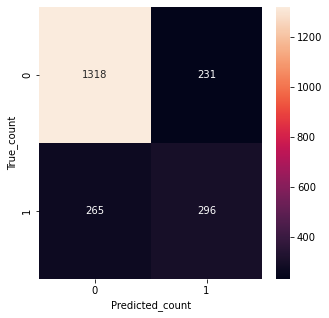

In [519]:
cm = confusion_matrix(y_test, yr_predict) 
print ("Confusion Matrix : \n", cm)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted_count')
plt.ylabel('True_count')

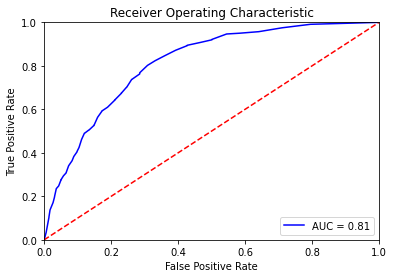

In [520]:
probs = model_rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# F1 score is very less for the Minority class when we perform SMOTE only on the train data and then Applying it on the test data.

In [528]:
#Applying Smote before and then splitting the dataset

df_model = df_1_dummies

X = df_model.drop('Churn', axis = 1)
Y = df_model['Churn']


In [529]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_resampled, y_resampled = smote.fit_resample(X ,Y )



In [530]:
y_resampled.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [531]:
X_resampled

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.850000,29.850000,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.950000,1889.500000,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.850000,108.150000,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.300000,1840.750000,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.700000,151.650000,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,84.719879,488.896257,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10322,0,91.051453,531.108958,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10323,0,81.784808,743.456714,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
10324,0,109.653798,7558.396409,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [532]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3 , stratify = y_resampled )

In [533]:
scale_cols = ['MonthlyCharges','TotalCharges']
# now we will scale all the numerical variables of the train data: 

scale = MinMaxScaler()

x_train[scale_cols] = scale.fit_transform(x_train[scale_cols])

In [534]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [535]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [536]:
#transform the columns on the test data don't fit_transform

x_test[scale_cols] = scale.transform(x_test[scale_cols])

In [537]:
yr_predict = model_rf.predict(x_test)

In [538]:
model_score = model_rf.score(x_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, yr_predict))


0.8195610071013557
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1549
           1       0.79      0.87      0.83      1549

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



Confusion Matrix : 
 [[1185  364]
 [ 195 1354]]


Text(24.0, 0.5, 'True_count')

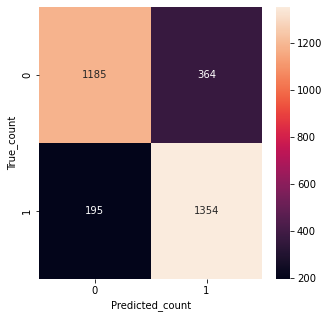

In [539]:
cm = confusion_matrix(y_test, yr_predict) 
print ("Confusion Matrix : \n", cm)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted_count')
plt.ylabel('True_count')

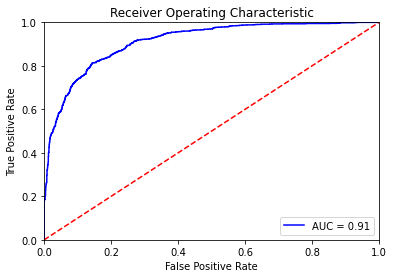

In [540]:
probs = model_rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# The Accuracy of the Model and the F1 score for the minority class Has increased by applying Smote Before on the complete Dataset and then Splitting the dataset.

# Undersampling of the majority class

In [542]:
df_model = df_1_dummies

df_1_dummies_0 = df_1_dummies[df_1_dummies['Churn'] == 0] #dataframe of class 0 
df_1_dummies_1 = df_1_dummies[df_1_dummies['Churn'] == 1]

In [543]:
df_class_0_under = df_1_dummies_0.sample(len(df_1_dummies_1))

df_test_under = pd.concat([df_class_0_under, df_1_dummies_1], axis = "rows")

In [544]:
df_test_under["Churn"].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [545]:
X = df_test_under.drop('Churn', axis = 1)
Y = df_test_under['Churn']


In [546]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3 , random_state = 41)

In [547]:
scale_cols = ['MonthlyCharges','TotalCharges']
# now we will scale all the numerical variables of the train data: 

scale = MinMaxScaler()

x_train[scale_cols] = scale.fit_transform(x_train[scale_cols])

In [548]:
model_rf = RandomForestClassifier(n_estimators=110, criterion='entropy', random_state = 100 ,max_depth=8, min_samples_leaf=5)

In [549]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       n_estimators=110, random_state=100)

In [550]:
x_test[scale_cols] = scale.transform(x_test[scale_cols])

In [551]:
yr_predict = model_rf.predict(x_test)

In [552]:
model_score = model_rf.score(x_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, yr_predict))

0.7718360071301248
              precision    recall  f1-score   support

           0       0.84      0.70      0.76       592
           1       0.72      0.85      0.78       530

    accuracy                           0.77      1122
   macro avg       0.78      0.78      0.77      1122
weighted avg       0.78      0.77      0.77      1122



Confusion Matrix : 
 [[416 176]
 [ 80 450]]


Text(24.0, 0.5, 'True_count')

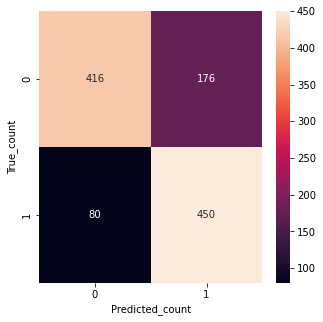

In [553]:
cm = confusion_matrix(y_test, yr_predict) 
print ("Confusion Matrix : \n", cm)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted_count')
plt.ylabel('True_count')

# oversampling the minority Classes

In [555]:
df_model = df_1_dummies

df_1_dummies_0 = df_1_dummies[df_1_dummies['Churn'] == 0] #dataframe of class 0 
df_1_dummies_1 = df_1_dummies[df_1_dummies['Churn'] == 1]

In [556]:
df_class_1_over = df_1_dummies_1.sample(len(df_1_dummies_0) , replace =True)

df_test_over = pd.concat([df_1_dummies_0, df_class_1_over], axis = "rows")

In [557]:
X = df_test_over.drop('Churn', axis = 1)
Y = df_test_over['Churn']


In [558]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3 , stratify = Y)

In [559]:
scale_cols = ['MonthlyCharges','TotalCharges']
# now we will scale all the numerical variables of the train data: 

scale = MinMaxScaler()

x_train[scale_cols] = scale.fit_transform(x_train[scale_cols])

In [560]:
model_rf = RandomForestClassifier(n_estimators=110, criterion='entropy', random_state = 100 ,max_depth=8, min_samples_leaf=5)

In [561]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       n_estimators=110, random_state=100)

In [562]:
x_test[scale_cols] = scale.transform(x_test[scale_cols])

In [563]:
yr_predict = model_rf.predict(x_test)

In [564]:
model_score = model_rf.score(x_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, yr_predict))

0.7918011620400258
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1549
           1       0.76      0.86      0.81      1549

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098



Confusion Matrix : 
 [[1119  430]
 [ 215 1334]]


Text(24.0, 0.5, 'True_count')

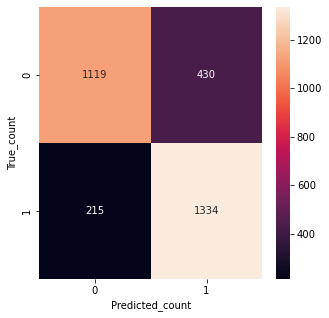

In [565]:
cm = confusion_matrix(y_test, yr_predict) 
print ("Confusion Matrix : \n", cm)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted_count')
plt.ylabel('True_count')

# SMOTE is predicting the Minority class better than the Oversampling and Undersampling Techniques.

# SVC Support Vector Classifer

In [212]:
df_model = df_1_dummies

X = df_model.drop('Churn', axis = 1)
Y = df_model['Churn']



In [213]:
scale_cols = ['MonthlyCharges','TotalCharges']

# now we will scale all the data: 
scale = MinMaxScaler()

#fit_transform on training data
x_train[scale_cols] = scale.fit_transform(x_train[scale_cols])

In [214]:

#lets apply the Smote on the training data only 

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_resampled, y_resampled = smote.fit_resample(X,Y)


In [215]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size = 0.3 , stratify = y_resampled)

In [216]:
model_svc = SVC(probability = True)

In [217]:
model_svc.fit(x_train,y_train)


SVC(probability=True)

In [218]:
x_test[scale_cols] = scale.transform(x_test[scale_cols])

In [219]:
y_predict = model_svc.predict(x_test)
model_score = model_svc.score(x_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_predict))

0.6523563589412524
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1549
           1       0.68      0.57      0.62      1549

    accuracy                           0.65      3098
   macro avg       0.66      0.65      0.65      3098
weighted avg       0.66      0.65      0.65      3098



# Logistic Regression

In [588]:
#Applying Smote before and then splitting the dataset

df_model = df_1_dummies

X = df_model.drop('Churn', axis = 1)
Y = df_model['Churn']


In [589]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_resampled, y_resampled = smote.fit_resample(X ,Y )



In [590]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3 , stratify = y_resampled )

In [591]:
scale_cols = ['MonthlyCharges','TotalCharges']
# now we will scale all the numerical variables of the train data: 

scale = MinMaxScaler()

x_train[scale_cols] = scale.fit_transform(x_train[scale_cols])

In [592]:
model_lr = LogisticRegression(max_iter=500)

In [593]:
x_test[scale_cols] = scale.transform(x_test[scale_cols])

In [594]:
model_lr.fit(x_train,y_train)


LogisticRegression(max_iter=500)

In [595]:
y_predict = model_lr.predict_proba(x_test)


In [596]:
y_predict[0:10]

array([[9.87172557e-01, 1.28274425e-02],
       [9.80010208e-01, 1.99897923e-02],
       [9.25178485e-01, 7.48215149e-02],
       [2.88319144e-02, 9.71168086e-01],
       [9.90206771e-01, 9.79322883e-03],
       [3.19520128e-01, 6.80479872e-01],
       [3.09194720e-01, 6.90805280e-01],
       [3.41592817e-01, 6.58407183e-01],
       [5.52041429e-04, 9.99447959e-01],
       [8.46922905e-01, 1.53077095e-01]])

In [597]:
y_pred = model_lr.predict(x_test)

In [598]:
y_pred[0:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

In [599]:
model_score = model_lr.score(x_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_pred))

0.8634602969657844
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.89      0.83      0.86      1549

    accuracy                           0.86      3098
   macro avg       0.87      0.86      0.86      3098
weighted avg       0.87      0.86      0.86      3098



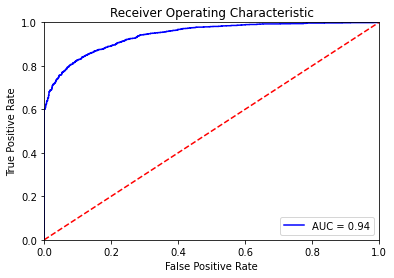

In [601]:
probs = model_lr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()